# PROYECTO DEL MÓDULO 1: DATASET TITANIC
<img src="./Titanic_1.jpg" width="400px">

*Imagen: Ilustración del RMS Titanic realizada por IA.*

## ÍNDICE

### 1. Carga de librerías

### 2. Lectura del dataset

### 3. Información del dataset
  - Visualización de dataframe
  - Búsqueda de valores nulos y duplicados.

### 4. Preprocesamiento
  - Reorganización de columnas
    - Nueva columna ``Title`` con los títulos de cada pasajero.
    - Pasar a índice la columna ``PassengerId``, que no aporta mucha información.
  - Reparación de valores nulos:
    - Reparación de valores nulos en columna ``Cabin`` a través del atributo ***'Unknown'***.
    - Imputación de valores nulos en columna ``Age`` a través de la mediana.
    - Imputación de valores nulos en columna ``Embarked`` a través de la moda.
  - Reparación de valores atípicos:
    - Observación de los datos mediante ***describe()***.
    - Tratamiento columna ``Fare``:
      - Visualización de la distribución.
      - Tratamiento valores atípicos.
    - Observación columna ``Age``.

### 5. Análisis y visualización de los datos
  - Visualización de las distintas variables del dataset (género, clase, tarifa, puerto de embarque, supervivientes).
  - Visualización de la relación entre variables:
    - Variable ``Survived`` - Análisis de la distribución según:
      - Género
      - Edad
      - Clase
      - Tarifa
      - Título del pasajero
  - **Conclusiones**
  - Otros datos curiosos:
    - Estudio de la columna ``Ticket`` y ``Fare``
    - Estudio de la columna ``SibSp``
    - Estudio de la columna ``Parch``
    - Estudio de la columna ``Title``
  - Análisis de correlación entre variables


---
### Carga de librerías

In [6]:
import numpy as np 
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Lectura del dataset

In [7]:
df = pd.read_csv('./titanic.csv')

### Información del dataset

In [8]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info() # Hay nulos en las columnas Age, Cabin y Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

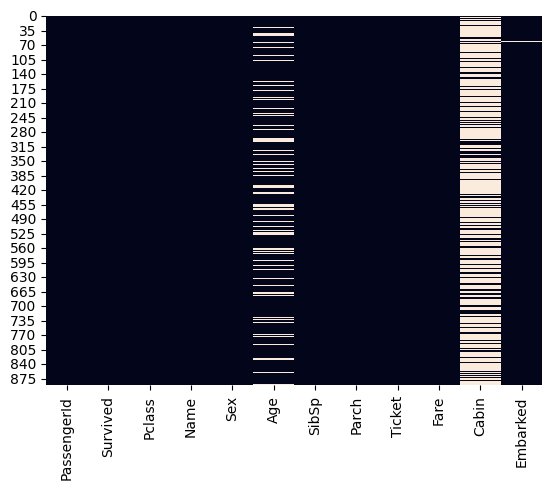

In [11]:
# Mapa de calor de seaborn para visualizar los valores nulos. Podemos ver como están sobretodo en la columna Cabin
sns.heatmap(df.isnull(), cbar=False) 

In [12]:
df.isnull().sum() # Contamos los valores nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.isnull().sum()/len(df)*100 # Hacemos su porcentaje

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
df.duplicated().sum() # Vemos que no existen valores duplicados

0

---
## Pre-procesamiento

#### REORGANIZACIÓN DE COLUMNAS

- De la columna ``Name`` se pueden extraer los títulos que poseía cada persona, para posteriormente analizar dicha variable en relación al ratio de supervivencia. Por lo tanto generamos una nueva columna llamada ``Title``:

In [15]:
# Extraer el título de la columna 'Name'
df['Title'] = df['Name'].apply(lambda x: re.search(r'\b([A-Za-z]+)\.', x).group(0))

'''La función re.search() busca esta expresión regular en cada nombre de la columna 'Name'. El método group(0) devuelve la coincidencia completa encontrada por la expresión regular.
\b representa el límite de la palabra, que la expresion regular es el inicio o final de una palabra (en este caso ambos)
'''
# Mostrar todos los títulos
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

Hay muchos títulos que representan a la nobleza o a títulos militares, etc. pero están expresados con nombres diferentes. Vamos a agruparlos:

In [16]:
# Nobleza y otros títulos especiales los reemplazamos por 'Special'
df['Title'] = df['Title'].replace(['Countess.','Jonkheer.','Lady.','Sir.', 'Don.','Dona.','Major.', 'Col.', 'Capt.','Rev.','Dr.'],'Special')
# Mlle.: Mademoiselle en frances, similar a "Miss" en inglés. Reemplazamos por Miss
# Ms. es la abreviatura de Miss.,:
df['Title'] = df['Title'].replace(['Mlle.','Ms.'],'Miss.')
# Cambiamos Madame (Mme) por Señora (Mrs.):
df['Title'] = df['Title'].replace(['Mme.'],'Mrs.')

df['Title'].value_counts()

Mr.        517
Miss.      185
Mrs.       126
Master.     40
Special     23
Name: Title, dtype: int64

- La columna ``PassengerId`` no nos aporta información, por lo que vamos a pasarla a índice:


In [17]:
df.set_index('PassengerId', inplace=True)

#### REPARACIÓN DE VALORES NULOS

La columna ``Age`` tiene una media y una mediana similares, al no existir valores atípicos. Pero para reparar los valores nulos lo haremos con la mediana de la columna, ya que la edad es una variable discreta.
Por otro lado, las otras dos columnas con datos nulos, ``Cabin`` y ``Embarked``, son de tipo **object**. Los nulos de la columna ``Cabin`` no tiene mucho sentido reemplazarlos por los valores mayoritarios (la moda), ya que cada persona o familia tenía su propia cabina, por lo que podemos reemplazarlos por ***Unknown***. Por otro lado, los nulos de la columna ``Embarked``, que solo son 2, sí que se podrían reemplazar por la moda de los valores, ya que esa variable representa el lugar desde donde embarcaron los pasajeros:

In [18]:
# Primero reparamos la columna Cabin
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [19]:
# De la columna Embarked solo hay 2 datos faltantes:
df[df['Embarked'].isnull()]
# Vemos como compartían cabina. Además, investigando, se sabe que Miss. Amelie era la sirvienta de Mrs. Stone. Por lo tanto se determina que embarcaron desde el mismo sitio.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss.
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs.


In [20]:
# Función para la reparación de nulos
def reparar_nulos(df, col):
    if df[col].dtype == 'int64':
        df[col] = df[col].fillna(df[col].mean())
    elif df[col].dtype == 'float64': # La edad en este dataset es de tipo float
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0]) 
                  
    return df 

for col in df.columns:
    reparar_nulos(df, col)

df.isnull().sum()/len(df)*100 # Observamos que ya no hay valores nulos

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
Title       0.0
dtype: float64

In [21]:
# Cambiamos el tipo de datos de la columna Age a enteros, ya que estaban en float
df['Age'] = df['Age'].astype(int)

#### REPARACIÓN DE VALORES ATÍPICOS

In [22]:
df.describe().transpose() # Vemos los parámetros descriptivos de todas las variables del dataset

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.345679,13.028212,0.0,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Podemos observar que la desviación estándar de los datos de la columna ``Fare`` es muy alta, lo que indica mucha dispersión de los datos alrededor de la media. Observando el parámetro del tercer cuartil, que indica que el 75% de los valores son menores de 31, podemos apoyar el hecho de que existen valores atípicos (como por ejemplo el valor máximo de 512.3292) que eleva la media y hace que los datos se dispersen mucho. Esto falsea los resultados, por lo tanto hay que repararlo:

- Visualización de la distribución de la columna ``Fare``:

In [23]:
# Crear una figura y dos subplots con plotly.subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histograma", "Diagrama de Cajas"))

# Primer gráfico: histograma con Plotly
fig.add_trace(
    go.Histogram(x = df["Fare"], opacity=0.75, showlegend=False,
                 marker=dict(color='#73C4A8', line=dict(color='#136348', width=1))), row=1, col=1)

# Segundo gráfico: diagrama de cajas con Plotly
fig.add_trace(
    go.Box(x = df["Fare"], name = 'Tarifa', showlegend=False, opacity=None, marker=dict(color='#B098E3', line=dict(color='#665784', width=1))), row=1, col=2)

# Actualizar el diseño y los títulos
fig.update_layout(xaxis_title="Tarifa", yaxis_title="Frecuencia", height=500, width=1500, title_text="Histograma y Diagrama de Cajas de la columna 'Fare'", title_x=0.5)
fig.update_xaxes(dtick=50)
# Mostrar la figura
fig.show()

- Reparación de los valores atípicos de la columna ``Fare``:

Una vez visualizados los valores atípicos, vamos a calcularlos. Para ello, consideramos valores atípicos los que superan el rango intercuartílico (IQR) multiplicado por 1,5, por encima o por debajo. Considerando que IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), el cálculo sería el siguiente:

``` bash
Límite atípico inferior = Q1 - (1.5 * IQR)
Límite atípico superior = Q3 + (1.5 * IQR)
```

Solo tenemos valores atípicos superiores, por lo tanto los vamos a reparar modificándolos con el valor del límite superior. Vamos a crear una función que englobe todo el proceso de reparación y transformación de valores atípicos:

In [24]:
# Función para reparar los valores atípicos
def reparar_atipicos(df, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    atipico_inf = Q1 - (1.5 * IQR)
    atipico_sup = Q3 + (1.5 * IQR)
    
    for indice in range(len(df[col.name])): # Itera sobre los índices del DataFrame para acceder a cada elemento de la columna col
        if indice in df.index:  # Verifica si el índice está en el rango válido
            elemento = df.loc[indice, col.name] # Accede al valor de la columna col en la fila correspondiente al índice actual.
            if elemento > atipico_sup: 
                df.loc[indice, col.name] = atipico_sup
            elif elemento < atipico_inf: 
                df.loc[indice, col.name] = atipico_inf
            
    return df 

reparar_atipicos(df, df['Fare'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S,Special
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss.
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,Unknown,S,Miss.


Repetimos la visualización de la distribución, para observar si se han reparado esos valores atípicos:

In [25]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histograma", "Diagrama de Cajas"))
fig.add_trace(
    go.Histogram(x = df["Fare"], opacity=0.75, showlegend=False,
                 marker=dict(color='#73C4A8', line=dict(color='#136348', width=1))), row=1, col=1)
fig.add_trace(
    go.Box(x = df["Fare"], name = 'Tarifa', showlegend=False, opacity=None, marker=dict(color='#B098E3', line=dict(color='#665784', width=1))), row=1, col=2)

fig.update_layout(xaxis_title="Tarifa", yaxis_title="Frecuencia", height=500, width=1500, title_text="Histograma y Diagrama de Cajas de la columna 'Fare'", title_x=0.5)
fig.update_xaxes(dtick=10)
fig.show()

La variable ``Age`` también tiene una desviación alta. Vamos a graficarla para ver si hay algún valor atípico:

In [26]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histograma", "Diagrama de Cajas"))
fig.add_trace(
    go.Histogram(x = df["Age"], opacity=0.75, showlegend=False,
                 marker=dict(color='#73C4A8', line=dict(color='#136348', width=1))), row=1, col=1)
fig.add_trace(
    go.Box(x = df["Age"], name = 'Edad', showlegend=False, opacity=None, marker=dict(color='#B098E3', line=dict(color='#665784', width=1))), row=1, col=2)

fig.update_layout(xaxis_title="Edad", yaxis_title="Frecuencia", height=500, width=1500, title_text="Histograma y Diagrama de Cajas de la columna 'Age'", title_x=0.5)
fig.update_xaxes(dtick=10)
fig.show()

In [27]:
# Edad min y max
print('Edad mínima de los pasajeros:', df['Age'].min(),'\nEdad máxima de los pasajeros:', df['Age'].max())

Edad mínima de los pasajeros: 0 
Edad máxima de los pasajeros: 80


Parece que los valores que toma la variable ``Age`` son coherentes y aunque en el diagrama de cajas haya valores atípicos, no están fuera de lo normal.

---
## Análisis y visualización de los datos

En primer lugar, nos interesa saber la distribución de las diferentes variables del dataset.

- **Distribución de la variable ``Sex``**: Empezaremos con la distribución del género en las personas embarcadas. Vemos que los hombres fueron casi el doble que las mujeres que embarcaron en el Titanic:

In [28]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
# Creamos el gráfico de pastel para ver las proporciones
colors = ['#A9DFBF', '#F9E79F']
fig = px.pie(values=df['Sex'].value_counts(), names=['Hombres','Mujeres'], color_discrete_sequence=colors)
fig.update_layout(width=500, height=500, showlegend=True, title='Distribución de los pasajeros por género',  title_x=0.5,
                  legend=dict(
        orientation='h',  # Orientación horizontal
        y=0,  # Desplazamiento vertical desde el gráfico (0-1)
        xanchor='center',  # Ancla en el centro horizontal
        x=0.5  # Desplazamiento horizontal desde el gráfico (0-1)
    ))
fig.update_traces(textinfo='percent', textfont_size=16, marker = dict(line = dict(color = 'black', width = 0.5)))
fig.show()

- **Distribución de la variable ``Pclass``**: Vemos que había una mayor cantidad de personas en tercera clase, lo que concuerda también con el gráfico de la distribución de las tarifas (columna ``Fare``) que veremos en el siguiente punto:

In [30]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\kina5\AppData\Local\Temp\ipykernel_35428\1673590679.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kina5\AppData\Local\Temp\ipykernel_35428\1673590679.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



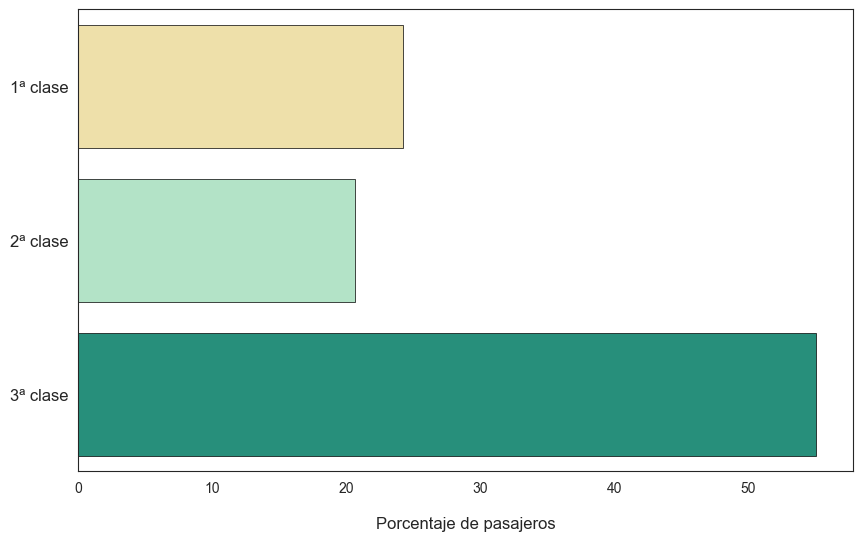

In [31]:
# Primero definimos los colores por clase
colors = {'1': '#F9E79F', '2': '#ABEBC6', '3': '#16A085'}

# Definimos el tamaño del gráfico y el estilo de fondo
plt.figure(figsize=(10, 6))
sns.set_style("white") 

# Hacemos gráfico countplot y mostramos el porcentaje de pasajeros por cada clase
ax = sns.countplot(data=df, y='Pclass', stat="percent", palette = colors, edgecolor='black',linewidth=0.5) 

ax.set_yticklabels(['1ª clase', '2ª clase', '3ª clase'], fontsize = 12) # Cambiamos el nombre de las etiquetas del eje x

ax.set_xlabel('Porcentaje de pasajeros', labelpad = 15, fontsize=12) # Establecer el título del eje y y separarlo del eje
ax.set_ylabel('');

- **Distribución de la variable ``Fare``**: Se observa una mayor densidad en las tarifas bajas que en las altas:

In [32]:
df['Fare'].value_counts()

65.6344    116
8.0500      43
13.0000     42
7.8958      38
7.7500      34
          ... 
6.8583       1
34.6542      1
12.6500      1
12.0000      1
10.5167      1
Name: Fare, Length: 204, dtype: int64

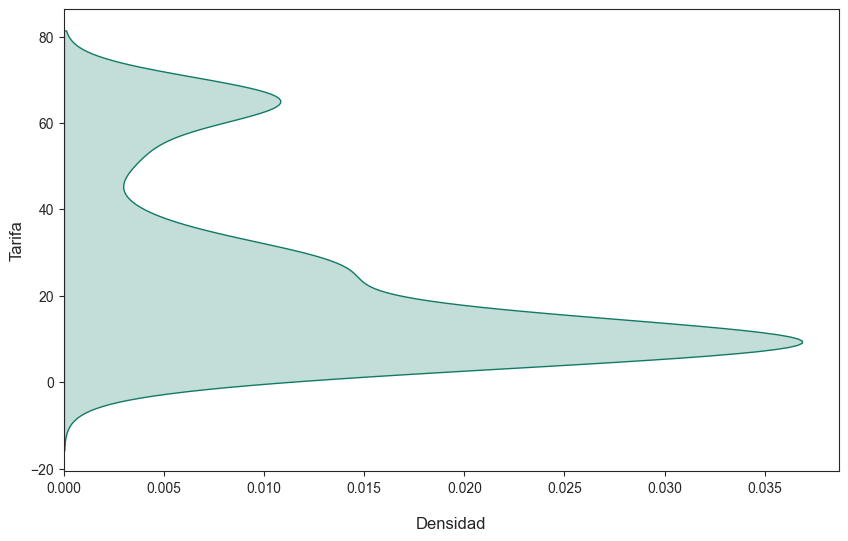

In [33]:
# Crear el gráfico de densidad de las tarifas

plt.figure(figsize=(10, 6))
sns.set_style("ticks") 
ax = sns.kdeplot(data=df, y='Fare', fill=True, color='#117A65')
ax.set_xlabel('Densidad', labelpad = 15, fontsize=12)
ax.set_ylabel('Tarifa', fontsize=12)
plt.show()

- **Distribución de la variable ``Embarked``**: Se observa que el mayor porcentaje de pasajeros embarcaron desde Southampton:

In [34]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\kina5\AppData\Local\Temp\ipykernel_35428\4076450437.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kina5\AppData\Local\Temp\ipykernel_35428\4076450437.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



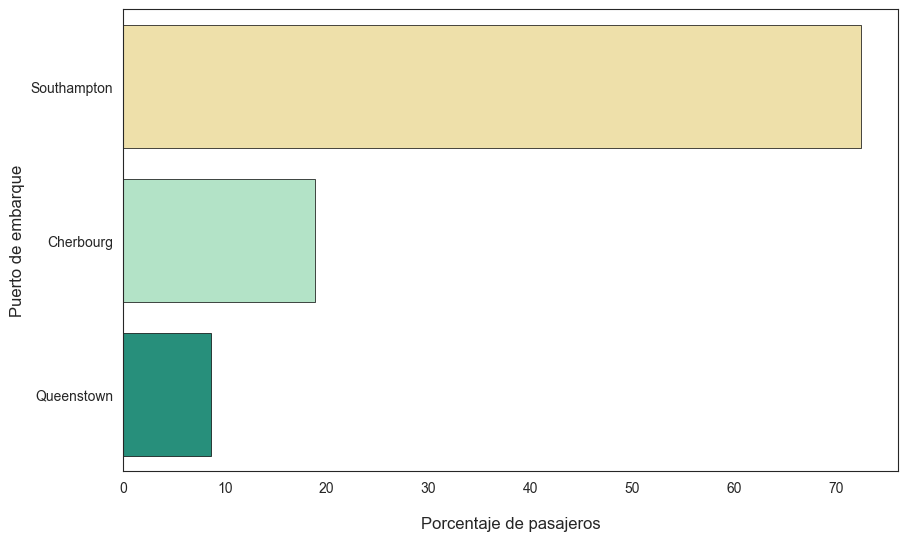

In [35]:
# Hacemos gráfico countplot y mostramos el número de pasajeros por cada puerto de embarque

plt.figure(figsize=(10, 6))
sns.set_style("white") 
colors = {'S': '#F9E79F', 'C': '#ABEBC6', 'Q': '#16A085'}

ax = sns.countplot(data=df, y='Embarked', stat="percent", palette = colors,edgecolor='black',linewidth=0.5)

ax.set_yticklabels(['Southampton', 'Cherbourg', 'Queenstown']) # Cambiamos el nombre de las etiquetas del eje x

ax.set_xlabel('Porcentaje de pasajeros', labelpad = 15, fontsize=12) # Establecer el título del eje y y separarlo del eje
ax.set_ylabel('Puerto de embarque',fontsize=12);

Vamos a estudiar esta variable en relación a la clase a la que pertenecía cada pasajero. Vemos que en Southampton y Queenston la mayoría de pasajeros embarcaron en 3ª clase, mientras que en Cherbourg los de 1ª clase superaron a los de 3ª:

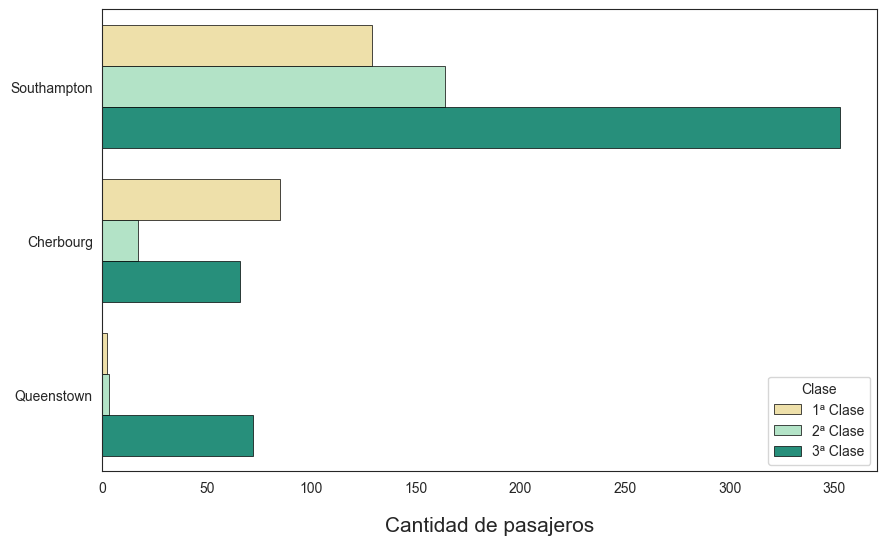

In [36]:
plt.figure(figsize=(10, 6))
sns.set_style("white") 
colors = {1: '#F9E79F', 2: '#ABEBC6', 3: '#16A085'}
ax = sns.countplot(data=df, y='Embarked', hue='Pclass',palette = colors, edgecolor='black',linewidth=0.5)

# Establecer las posiciones de las marcas en el eje y
ax.set_yticks([0, 1, 2])

# Establecer las etiquetas personalizadas para el eje y
ax.set_yticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# ax.set_title('Cantidad de pasajeros para cada puerto de embarque por clases')
ax.set_xlabel('Cantidad de pasajeros', labelpad=15,fontsize=15)
ax.set_ylabel('')

plt.legend(title='Clase', labels=['1ª Clase', '2ª Clase', '3ª Clase'],loc=4)

plt.show()

- **Distribución de la variable ``Survived``**: Por último, estudiamos la distribución de los supervivientes y no supervivientes, y observamos que hubo un mayor porcentaje de pasajeros que no sobrevivieron al accidente:

In [37]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
# Crear el gráfico de pastel
colors = ['#493838', '#73C4A8']
fig = px.pie(values=df['Survived'].value_counts(), names=['No supervivientes','Supervivientes'], color_discrete_sequence=colors, hole=0.3)
fig.update_layout(width=600, height=500, showlegend=True, title='Supervivientes del Titanic',  title_x=0.5, template = 'plotly_white',legend=dict(
        orientation='h',  # Orientación horizontal
        y=-0.05,  # Desplazamiento vertical desde el gráfico (0-1)
        xanchor='center',  # Ancla en el centro horizontal
        x=0.5  # Desplazamiento horizontal desde el gráfico (0-1)
    ))
fig.update_traces(textinfo='percent',textfont_size=16)
fig.update_traces(marker = dict(line = dict(color = 'black', width = 0.5)))

fig.show()

---
##### Una vez visualizado la distribución de las variables del dataset, vamos a estudiar en más detalle la variable ``Survived`` y las características de las personas que sobrevivieron y que murieron (rango de edad, género, clase, tarifa pagada y título):

- ##### Distribución de la variable ``Survived`` según el **género**:

Calculamos la distribución del **género** entre las personas supervivientes, y podemos observar como las mujeres doblaban en número a los hombres:

In [39]:
#Calculamos las personas que sobrevivieron en cuanto a su género
sex_survived = df[df['Survived']==1]['Sex']
sex_survived.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [40]:
# Filtrar pasajeros por género
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']
# Filtrar cada género por su supervivencia
female_survived = female[female['Survived']==1]
male_survived = male[male['Survived']==1]
female_deceased = female[female['Survived']==0]
male_deceased = male[male['Survived']==0]

In [41]:
# Calcular el porcentaje de hombres y mujeres supervivientes
print('El porcentaje de mujeres supervivientes fue del', (female_survived.shape[0] / len(female)) * 100,'%\nEl porcentaje de hombres supervivientes fue del', (male_survived.shape[0] / len(male)) * 100,'%')
print('El porcentaje de mujeres no supervivientes fue del', (female_deceased.shape[0] / len(female)) * 100,'%\nEl porcentaje de hombres no supervivientes fue del', (male_deceased.shape[0] / len(male)) * 100,'%')

El porcentaje de mujeres supervivientes fue del 74.20382165605095 %
El porcentaje de hombres supervivientes fue del 18.890814558058924 %
El porcentaje de mujeres no supervivientes fue del 25.796178343949045 %
El porcentaje de hombres no supervivientes fue del 81.10918544194108 %


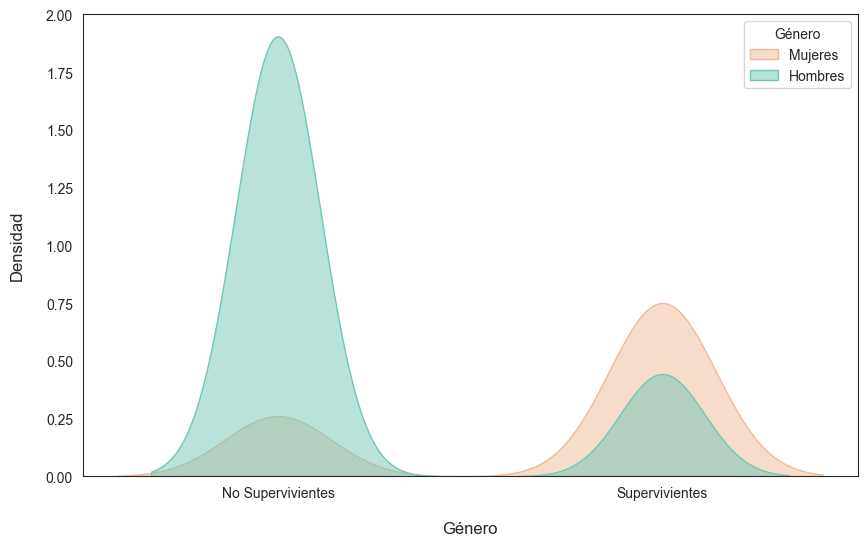

In [42]:
plt.figure(figsize=(10, 6))
colors = {'male': '#73C6B6', 'female': '#EDBB99'}
# Crear el gráfico de densidad de pasajeros por género
ax = sns.kdeplot(data=df, x='Survived', label= 'Sexo', hue='Sex', fill=True, alpha=0.5, palette = colors)
# Establecer las posiciones de las marcas en el eje x
ax.set_xticks([0, 1])
# Cambiar el nombre de las etiquetas del eje x
ax.set_xticklabels(['No Supervivientes', 'Supervivientes'])
# plt.title('Densidad de pasajeros supervivientes y no supervivientes por Género')
ax.set_xlabel('Género', labelpad = 15, fontsize=12)
ax.set_ylabel('Densidad', labelpad = 15, fontsize=12)


# Cambiar los nombres dentro de la leyenda
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Mujeres', 'Hombres']  # Nuevos nombres para las etiquetas
ax.legend(handles=handles, labels=new_labels, title='Género')

plt.show()

- ##### Distribución de la variable ``Survived`` según la **edad**:

Graficamos la distribución de la edad entre las personas supervivientes y observamos que de entre las personas que no sobrevivieron, había una mayor densidad de personas con edades de entre 20 y 40 años que entre las personas que sobrevivieron:

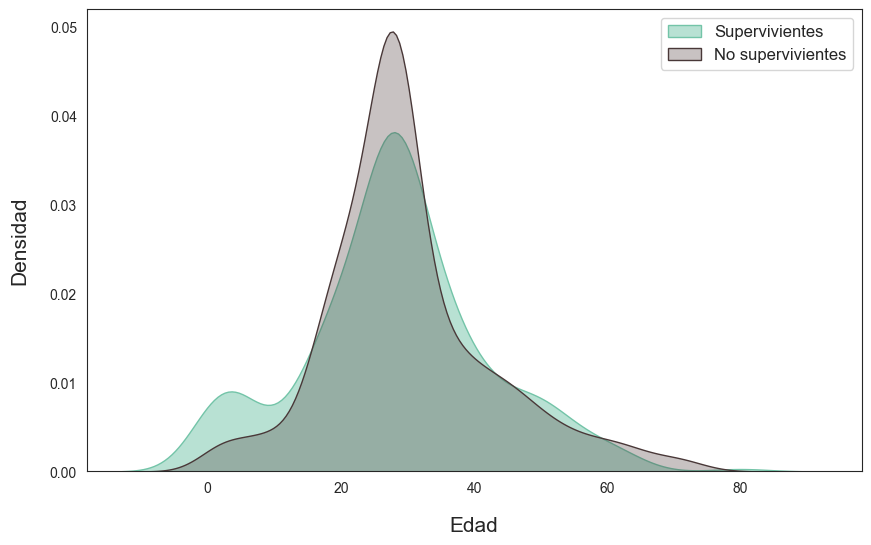

In [43]:
# Filtrar los datos para supervivientes y no supervivientes
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

# Crear el gráfico de densidad para estudiar la distribución de las edades de los supervivientes y no supervivientes
plt.figure(figsize=(10, 6))
sns.kdeplot(data=survivors['Age'], label='Supervivientes', fill=True, color = '#73C4A8', alpha=0.5)
sns.kdeplot(data=non_survivors['Age'], label='No supervivientes', fill=True, color = '#493838', alpha=0.3)

# plt.title('Distribución de Edades de Supervivientes y No Supervivientes')
plt.xlabel('Edad', labelpad = 15, fontsize=15)
plt.ylabel('Densidad', labelpad = 15, fontsize=15)
plt.legend(fontsize='large')

plt.show()

Calculamos ahora la media de edad entre los que sobrevivieron y los que no. Vemos que la media de los que no sobrevivieron fue un poco mayor:

In [44]:
age_survived = survivors['Age']
age_deceased = non_survivors['Age']
print('Media de edad supervivientes:', age_survived.mean(), '\nMedia de edad no supervivientes:', age_deceased.mean())

Media de edad supervivientes: 28.27485380116959 
Media de edad no supervivientes: 30.012750455373407


Y la media de edad de los supervivientes y no supervivientes según su género:

In [45]:
print(f'La media de edad de las mujeres supervivientes fue de {round(female_survived["Age"].mean(),2)} años')
print(f'La media de edad de los hombres supervivientes fue de {round(male_survived["Age"].mean(),2)} años')
print(f'La media de edad de las mujeres no supervivientes fue de {round(female_deceased["Age"].mean(),2)} años')
print(f'La media de edad de los hombres no supervivientes fue de {round(male_deceased["Age"].mean(),2)} años')

La media de edad de las mujeres supervivientes fue de 28.71 años
La media de edad de los hombres supervivientes fue de 27.35 años
La media de edad de las mujeres no supervivientes fue de 25.65 años
La media de edad de los hombres no supervivientes fue de 30.77 años


Graficamos la distribución de pasajeros supervivientes y no supervivientes en base a la edad mediante histogramas:

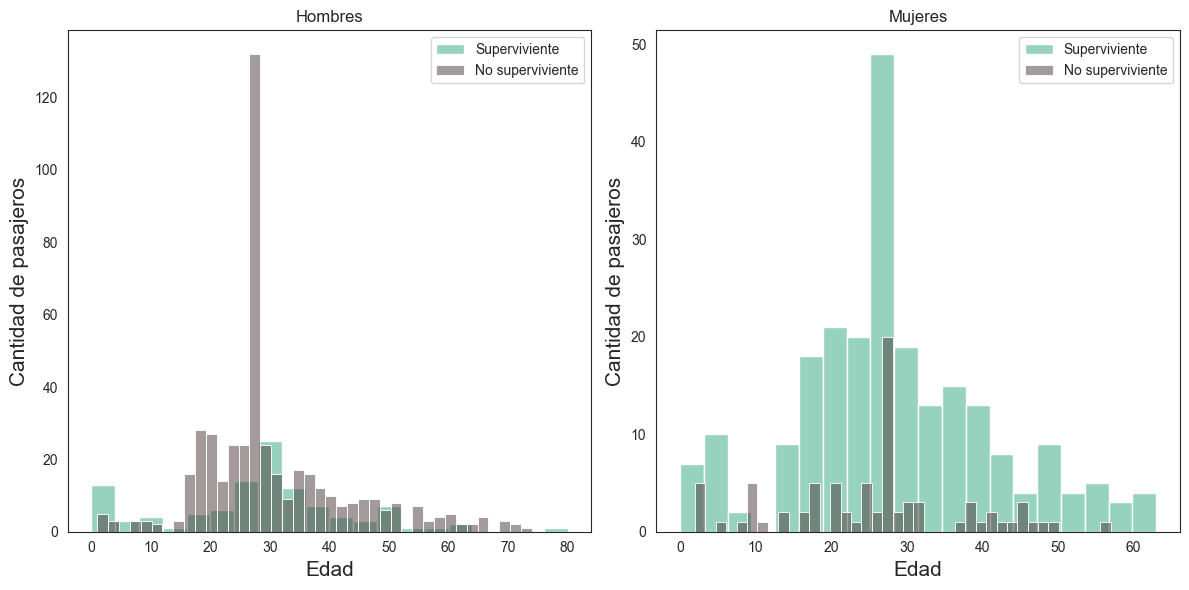

In [46]:
# Creamos los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma para hombres
sns.histplot(male[male['Survived'] == 1]['Age'], label='Superviviente', bins=20, kde=False, ax=axes[0], color = '#73C4A8')
sns.histplot(male[male['Survived'] == 0]['Age'], label='No superviviente', bins=40, kde=False, ax=axes[0],color = '#493838',alpha=0.5)
axes[0].set_title('Hombres')
axes[0].legend()

# Histograma para mujeres
sns.histplot(female[female['Survived'] == 1]['Age'], label='Superviviente', bins=20, kde=False, ax=axes[1],color = '#73C4A8')
sns.histplot(female[female['Survived'] == 0]['Age'], label='No superviviente', bins=40, kde=False, ax=axes[1],color = '#493838',alpha=0.5)
axes[1].set_title('Mujeres')
axes[1].legend()

# Configuración de etiquetas de ejes y leyenda
axes[0].set_xlabel('Edad', fontsize=15)
axes[0].set_ylabel('Cantidad de pasajeros', fontsize=15)
axes[1].set_xlabel('Edad', fontsize=15)
axes[1].set_ylabel('Cantidad de pasajeros', fontsize=15)

plt.tight_layout() # Ajusta los subplots
plt.show()

- ##### Distribución de la variable ``Survived`` según la **clase** en la que viajaba cada pasajero:

Graficamos la distribución de la clase entre las personas supervivientes y observamos que la mayoría de los que no sobrevivieron viajaban en 3ª clase:

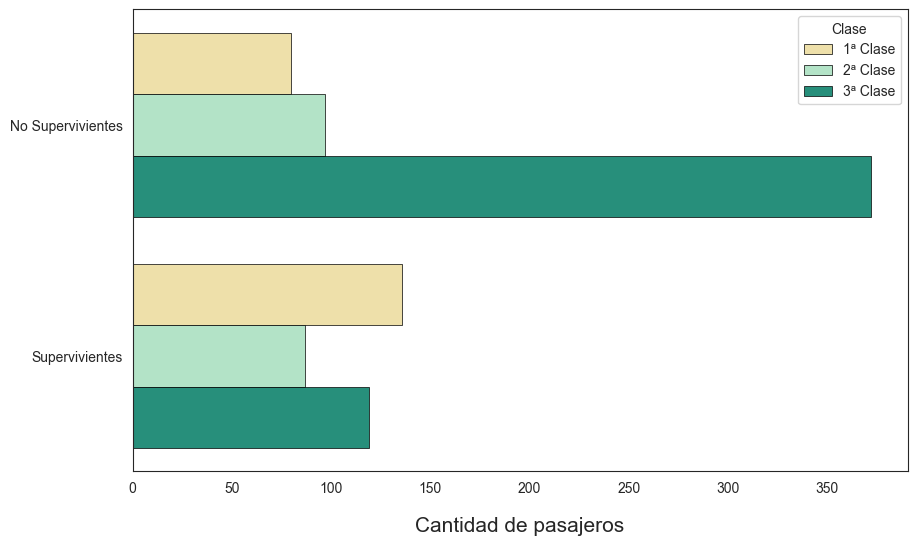

In [47]:
# Primero definimos los colores por clase
colors = {1: '#F9E79F', 2: '#ABEBC6', 3: '#16A085'}
plt.figure(figsize=(10, 6))
sns.set_style("white") 

ax = sns.countplot(data=df, y='Survived',hue='Pclass', palette = colors, edgecolor='black',linewidth=0.5) 
# Establecer las posiciones de las marcas en el eje x
ax.set_yticks([0, 1])
# Cambiar el nombre de las etiquetas del eje x
ax.set_yticklabels(['No Supervivientes', 'Supervivientes'])

ax.set_xlabel('Cantidad de pasajeros', labelpad = 15, fontsize=15) 
ax.set_ylabel('') 

plt.legend(title='Clase', labels=['1ª Clase', '2ª Clase', '3ª Clase']);

Ahora con porcentajes:

In [48]:
# Calcular los porcentajes de supervivencia por clase
total_class = df['Pclass'].value_counts()
# Calcular el número de pasajeros por título y supervivencia
class_survived = df.groupby(['Pclass', 'Survived']).size() # size es una funcion de agregacion que cuenta el número de filas (pasajeros) en cada combinacion formada por la operación groupby
#Calculo el porcentaje
perc_class_survived = class_survived.div(total_class, level='Pclass') * 100
perc_class_survived = perc_class_survived.reset_index() # Con .reset_index() convierto los índices en columnas para luego poder manipularlas
perc_class_survived.columns

Index(['Pclass', 'Survived', 0], dtype='object')

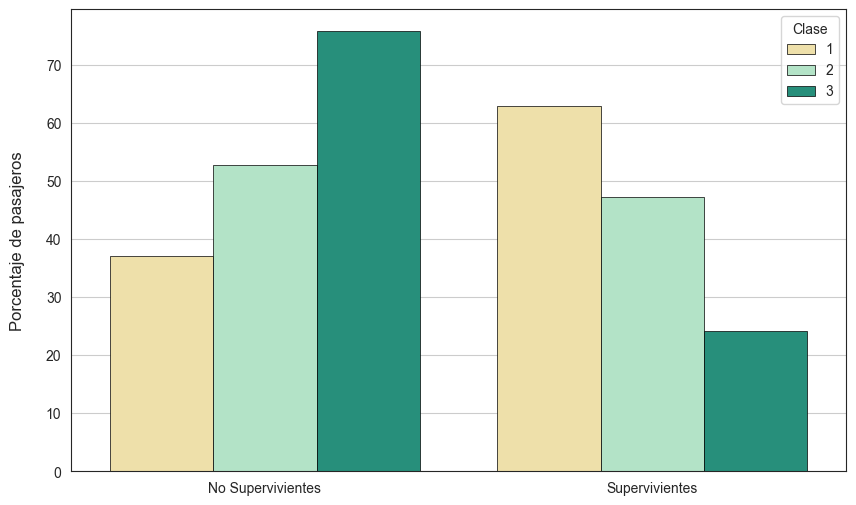

In [49]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
colors = {1: '#F9E79F', 2: '#ABEBC6', 3: '#16A085'}

ax = sns.barplot(data=perc_class_survived, x='Survived', y=0, hue='Pclass',palette=colors, edgecolor='black', linewidth=0.5)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Supervivientes', 'Supervivientes'])

ax.set_ylabel('Porcentaje de pasajeros', labelpad = 15, fontsize=12) 
ax.set_xlabel('') 

# Agregar cuadrícula en el eje horizontal
ax.grid(axis='y')

plt.legend(title='Clase');

Esta relación entre las clases y la supervivencia puede observarse también al analizar la relación entre los supervivientes y las tarifas de los billetes:

In [50]:
# Media de las tarifas pagadas por los no supervivientes:
df[df['Survived']==0]['Fare'].mean()

18.918247358834243

In [51]:
# Media de las tarifas pagadas por los supervivientes:
df[df['Survived']==1]['Fare'].mean()

32.27951140350877

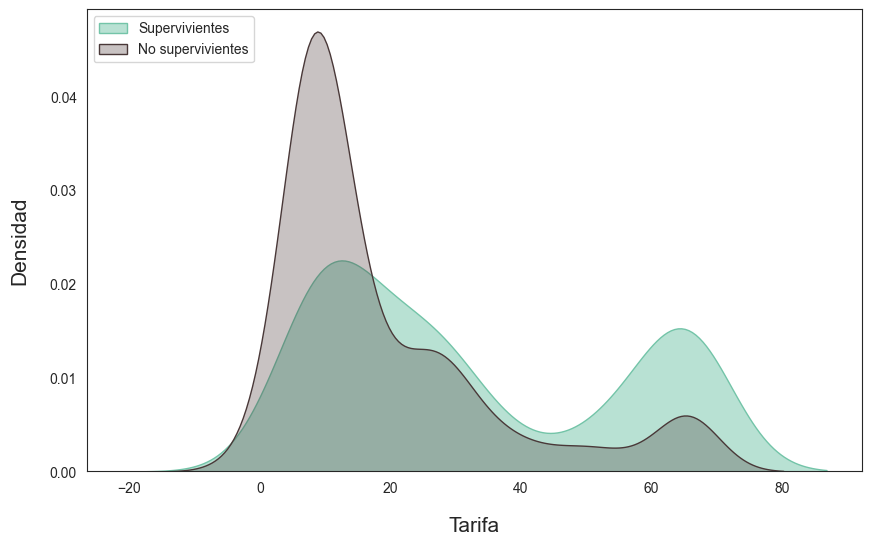

In [52]:
# Crear el gráfico de densidad para estudiar la tarifa pagada por cada pasajero entre los supervivientes y no supervivientes
plt.figure(figsize=(10, 6))
sns.kdeplot(data=survivors['Fare'], label='Supervivientes', fill=True, color = '#73C4A8', alpha=0.5)
sns.kdeplot(data=non_survivors['Fare'], label='No supervivientes', fill=True, color = '#493838', alpha=0.3)

# plt.title('Distribución de la tarifa pagada por cada pasajero entre Supervivientes y No Supervivientes')
plt.xlabel('Tarifa', labelpad = 15, fontsize=15)
plt.ylabel('Densidad', labelpad = 15, fontsize=15)
plt.legend(loc=2)

plt.show()

- ##### Distribución de la variable ``Survived`` según el **título** de cada pasajero:

El título ***Miss.*** además de a mujeres no casadas incluye también a las niñas, y ***Master.*** a los niños. Vemos que entre los supervivientes hay mayoría de niños, niñas y mujeres solteras, y entre los no supervivientes, la mayoría son hombres sin título nobiliario.

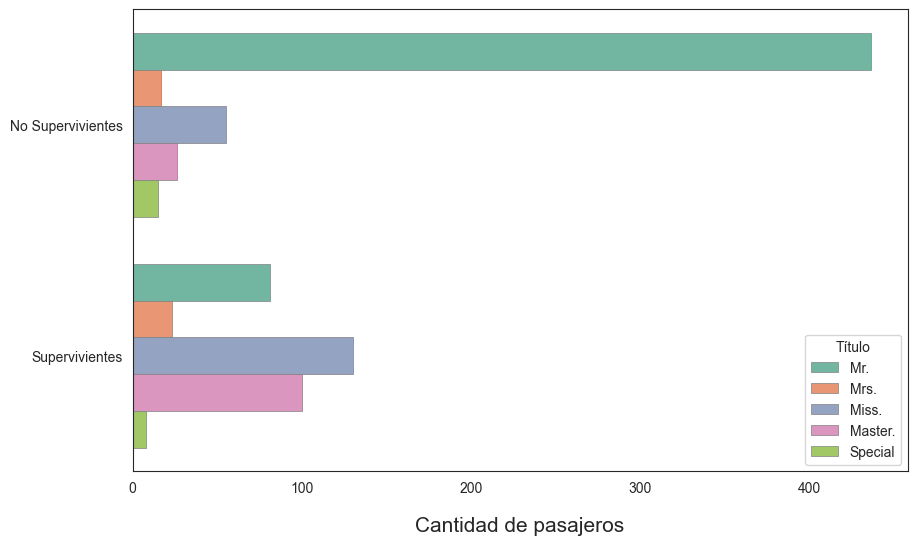

In [53]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
ax = sns.countplot(data=df, y='Survived',hue='Title', palette='Set2',edgecolor='grey',linewidth=0.5)

ax.set_yticks([0, 1])
ax.set_yticklabels(['No Supervivientes', 'Supervivientes'])
ax.set_xlabel('Cantidad de pasajeros', labelpad = 15, fontsize=15)
ax.set_ylabel('')
plt.legend(title='Título', labels=['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Special']);

Ahora con porcentajes:

In [54]:
total_Title = df['Title'].value_counts()
# Calcular el número de pasajeros por título y supervivencia
Title_Survived = df.groupby(['Title', 'Survived']).size() 
#Calculamos el porcentaje 
perc_Title_Survived = Title_Survived.div(total_Title, level='Title') * 100 
perc_Title_Survived = perc_Title_Survived.reset_index() 
perc_Title_Survived.columns

Index(['Title', 'Survived', 0], dtype='object')

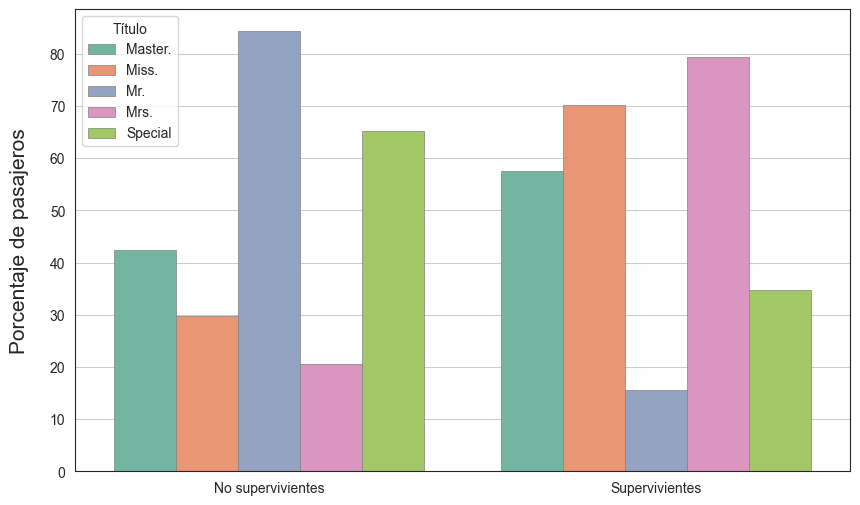

In [55]:
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=perc_Title_Survived, x='Survived', y=0, hue='Title',palette='Set2',edgecolor='grey',linewidth=0.5) 

ax2.set_xticks([0, 1])

# Agregar cuadrícula en el eje horizontal
ax2.grid(axis='y')

ax2.set_xticklabels(['No supervivientes', 'Supervivientes'])
ax2.set_ylabel('Porcentaje de pasajeros', labelpad = 15, fontsize=15) 
ax2.set_xlabel('') 
plt.legend(title='Título');
plt.show()

De los pasajeros con título nobiliario, militar o especial, no todos sobrevivieron:

In [56]:
df[df['Title']=='Special']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,Unknown,C,Special
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,244310,13.0000,Unknown,S,Special
151,0,2,"Bateman, Rev. Robert James",male,51,0,0,S.O.P. 1166,12.5250,Unknown,S,Special
246,0,1,"Minahan, Dr. William Edward",male,44,2,0,19928,65.6344,C78,Q,Special
250,0,2,"Carter, Rev. Ernest Courtenay",male,54,1,0,244252,26.0000,Unknown,S,Special
318,0,2,"Moraweck, Dr. Ernest",male,54,0,0,29011,14.0000,Unknown,S,Special
399,0,2,"Pain, Dr. Alfred",male,23,0,0,244278,10.5000,Unknown,S,Special
450,1,1,"Peuchen, Major. Arthur Godfrey",male,52,0,0,113786,30.5000,C104,S,Special
537,0,1,"Butt, Major. Archibald Willingham",male,45,0,0,113050,26.5500,B38,S,Special


### Conclusiones:

- Embarcaron más hombres (64.8%) que mujeres (35.2%).

- El porcentaje de personas que no sobrevivieron fue mayor (61.6%). De todas las mujeres, un 74.2% sobrevivió.

- De los hombres, falleció el 81.1%, con una media de edad de 30.77 años.

- La mayoría de los que no sobrevivieron pertenecían a la 3ª clase, y la mayoría de supervivientes pertenecían a la 1ª clase.

- Embarcaron más pasajeros desde Southampton, seguido de Cherbourg y Queenstown. En todos los puertos embarcaron mayoría de pasajeros en 3ª clase excepto en Cherbourg que fueron mayoría de 1ª clase.

---
##### Otros datos curiosos:

- Estudio de las columnas ``Ticket`` y ``Fare``:

Se observa que hay algunas tarifas con un valor de 0. ***¿A qué puede deberse esto?***

Observamos que todos estos pasajeros embarcaron en Southampton, todos eran hombres y todos viajaban solos. Además, algunos de ellos llevaban el ticket ``LINE``.

In [57]:
df[df['Fare']==0] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,Unknown,S,Mr.
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,B94,S,Mr.
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,Unknown,S,Mr.
278,0,2,"Parkes, Mr. Francis ""Frank""",male,28,0,0,239853,0.0,Unknown,S,Mr.
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,Unknown,S,Mr.
414,0,2,"Cunningham, Mr. Alfred Fleming",male,28,0,0,239853,0.0,Unknown,S,Mr.
467,0,2,"Campbell, Mr. William",male,28,0,0,239853,0.0,Unknown,S,Mr.
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28,0,0,239854,0.0,Unknown,S,Mr.
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,Unknown,S,Mr.


In [58]:
df[df['Ticket']=='LINE'] # Los tickets que son LINE, y que significan que son empleados de la American Line 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,Unknown,S,Mr.
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,Unknown,S,Mr.
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,Unknown,S,Mr.
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,Unknown,S,Mr.


In [59]:
df['Ticket'].value_counts() # Hay personas con el mismo número de ticket

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [60]:
df[df['Ticket']=='347082'] # Por ejemplo para el ticket 347082, vemos que tienen el mismo apellido, parece una familia. Todos pagaron la misma tarifa y embarcaron en Southampton

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.275,Unknown,S,Mr.
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2,4,2,347082,31.275,Unknown,S,Miss.
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9,4,2,347082,31.275,Unknown,S,Miss.
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.275,Unknown,S,Miss.
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39,1,5,347082,31.275,Unknown,S,Mrs.
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.275,Unknown,S,Miss.
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.275,Unknown,S,Master.


- Estudio de la columna ``SibSp``: significa número de hermanos (siblings) y/o cónyuges (spouses) a bordo 

In [61]:
df['SibSp'].value_counts() # La gran mayoría viajaba solo o con 1

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- Estudio de la columna ``Parch``: significa número de padres (parents) y/o hijos (children) a bordo

In [62]:
df['Parch'].value_counts() # La gran mayoría viajaba solo o con 1 o 2

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

---
## Análisis de correlación entre variables

Para ello hay que reemplazar las variables cualitativas como clase, embarque, género o título, en números:

In [63]:
df['Sex'] = df['Sex'].replace({'male':0,'female':1})
df['Pclass'] = df['Pclass'].replace({'1':1,'2':2, '3':3})
df['Embarked'] = df['Embarked'].replace({'S':0,'C':1, 'Q':2})

In [64]:
df_corr=df.corr()

C:\Users\kina5\AppData\Local\Temp\ipykernel_35428\4097978709.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [65]:
fig = px.imshow(df_corr, text_auto = True, color_continuous_scale='PRGn',zmin=-1, zmax=1)
fig.update_layout(
    title='Correlación entre las variables', title_x=0.5,
    template='plotly_white',
	width=800, height=600) 
fig.show()

Del gráfico de correlación podemos concluir lo siguiente:

- El **género** y la **supervivencia** tienen una correlación moderada positiva ``(0.54)``, lo que indica que hay una tendencia a que las mujeres (variable=1) tengan una probabilidad de sobrevivir.

- La **tarifa** y la **supervivencia** tienen una correlación moderada positiva ``(0.31)``, lo que indica que hay una tendencia a que las tarifas más altas tengan una mayor probabilidad de sobrevivir.

- La **clase** y la **tarifa** de cada billete están fuertemente correlacionados negativamente ``(-0.71)``, lo que indica que a medida que la clase aumenta, menor es el precio del billete.

- La **clase** y la **supervivencia** tienen una correlación moderada negativa ``(-0.33)``, lo que indica que hay una tendencia a que las personas de clases más altas (variable=1) tengan una mayor tasa de supervivencia.

- La **clase** y la **edad** tienen una correlación moderada negativa ``(-0.34)``, lo que indica que hay una tendencia a que las personas de clases más altas (variable=1) tengan más edad.

- La variable **Parch** (nº de padres/hijos) tiene una correlación muy débil ``(0.08)`` con respecto a la supervivencia, lo que indica que no hay una asociación significativa entre el nº de padres/hijos a bordo y la probabilidad o no de sobrevivir. Lo mismo con la variable **SibSp** (hermanos/cónyuges), que es del ``-0.03``.

---

---